<a href="https://colab.research.google.com/github/moizahmed813/CODSOFT/blob/main/Sales%20Prediction%20using%20Python/SalesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

In [30]:
# Viewing information available in the dataset
advertising_df = pd.read_csv('advertising.csv')

In [31]:
# Viewing information available in the dataset
print(advertising_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [32]:
# Viewing the description in the dataset to gain better insights.
print(advertising_df.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [ ]:
print(advertising_df.head(10))

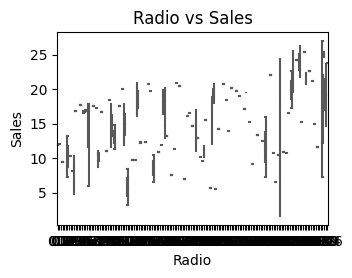

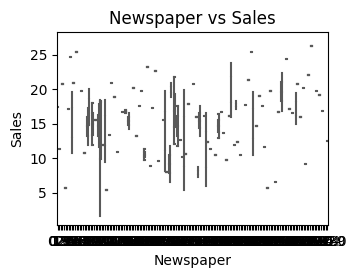

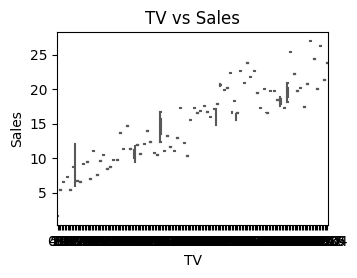

In [34]:
# Visualizing data in the dataframe with respect to sales
plt.figure(figsize=(3.5, 2.5))
sns.boxplot(x="Radio", y="Sales", data=advertising_df, width=0.3, palette="Set2")
plt.title("Radio vs Sales")

plt.figure(figsize=(3.5, 2.5))
sns.boxplot(x="Newspaper", y="Sales", data=advertising_df, width=0.3, palette="Set2")
plt.title("Newspaper vs Sales")

plt.figure(figsize=(3.5, 2.5))
sns.boxplot(x="TV", y="Sales", data=advertising_df, width=0.3, palette="Set2")
plt.title("TV vs Sales")
plt.show()

In [35]:
# Checking NaN/null values in the dataset
null_values = advertising_df.isnull().sum()
print(null_values)

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000



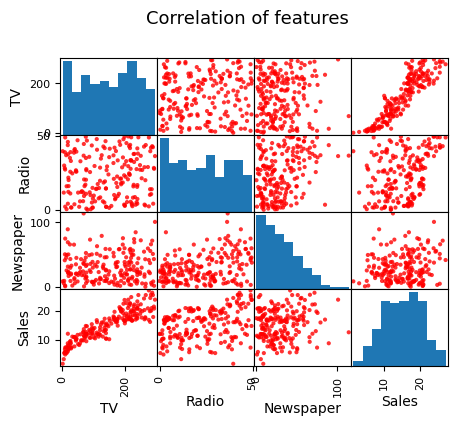

In [36]:
# Checking correlation of features using scatter matrix
correlation = advertising_df.corr()
print(correlation)
print()
scatter_matrix(advertising_df, figsize=(5, 4), diagonal='hist', color='red', alpha=0.8)
plt.suptitle("Correlation of features", y=1.0, fontsize=13)
plt.show()


Mean Squared Error: 2.9077569102710896
Root Mean Squared Error: 1.7052146229349223
R-squared: 0.9059011844150826



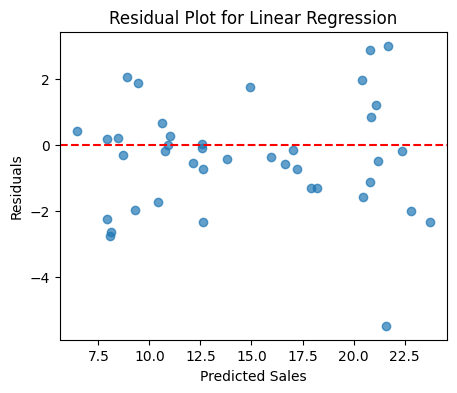

In [37]:
# Using machine learning model i.e. Linear Regression for survival prediction
X = advertising_df[["TV", "Radio", "Newspaper"]]
y = advertising_df["Sales"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print()

# Calculating the residuals and plotting residual plot
residuals = y_test - y_pred
plt.figure(figsize=(5, 4))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residual Plot for Linear Regression")
plt.show()

In [38]:
# Performing cross validation on above model
cv_scores = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
cv_scores = -cv_scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print("Cross-Validation Mean MSE:", mean_cv_score)
print("Cross-Validation Standard Deviation of MSE:", std_cv_score)

Cross-Validation Mean MSE: 2.8582430099910097
Cross-Validation Standard Deviation of MSE: 1.0258174582546045


Selected Features: Index(['TV', 'Radio'], dtype='object')



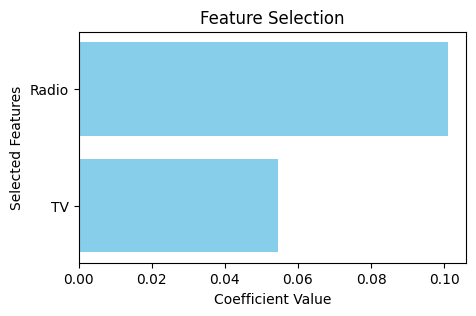

In [42]:
# Using feature selection to identify which advertising mediums are most influential in predicting Sales.
selector = SelectFromModel(estimator=model, threshold="mean")
selector.fit(X_train, y_train)
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]
print("Selected Features:", selected_feature_names)
print()

selected_feature_names = X.columns[selected_feature_indices]
selected_feature_coefficients = model.coef_[selected_feature_indices]

#  Visualizing the selected features from the model
plt.figure(figsize=(5, 3))
plt.barh(selected_feature_names, selected_feature_coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Selected Features')
plt.title('Feature Selection')
plt.show()